***The dataset contains detailed ball-by-ball data for IPL matches from 2008 to 2020.***

*Importing librtaries and data.*

In [14]:
import pandas as pd

# Load the uploaded dataset
file_path = '/Users/deepakdesale/Desktop/ASSIGNMENTS/IPL/IPL-Ball-by-Ball-2008-2020.CSV'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [18]:
# Data Quality Check

# Check for missing values
missing_values = df.isnull().sum()

In [20]:
missing_values

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [22]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()

In [26]:
duplicate_rows

1

In [28]:
# Data types
data_types = df.dtypes

In [30]:
data_types

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [32]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [34]:
# Since missing 'bowling_team' data is relatively small, we'll drop these rows for cleanliness
df_cleaned = df_cleaned.dropna(subset=['bowling_team'])

In [36]:
# Verify changes
missing_values_cleaned = df_cleaned.isnull().sum()
duplicates_cleaned = df_cleaned.duplicated().sum()

(missing_values_cleaned, duplicates_cleaned)

(id                       0
 inning                   0
 over                     0
 ball                     0
 batsman                  0
 non_striker              0
 bowler                   0
 batsman_runs             0
 extra_runs               0
 total_runs               0
 non_boundary             0
 is_wicket                0
 dismissal_kind      183791
 player_dismissed    183791
 fielder             186499
 extras_type         183061
 batting_team             0
 bowling_team             0
 dtype: int64,
 0)

In [41]:
df_cleaned.info

<bound method DataFrame.info of              id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke      

After cleaning, the dataset now contains 193,277 rows. The missing values in dismissal_kind, player_dismissed, fielder, and extras_type remain as is, which is appropriate given the nature of cricket data.

To generate relevant features that represent a batsman's performance, we'll focus on the following metrics:

*Total Runs Scored: The sum of batsman_runs for each batsman across all matches.

*Strike Rate: Calculated as "(Total Runs Scored/Total Balls Faced)×100". This represents how fast a batsman scores.

*Number of Matches Played: To identify players who have played at least 100 matches, we'll count the unique match IDs for each batsman.

*Total Wickets Taken (as a dismissal): Counts how many times a batsman has been dismissed, which is a proxy for how many innings they've played.

In [46]:
# Total Runs Scored by each batsman
total_runs = df_cleaned.groupby('batsman')['batsman_runs'].sum()

In [48]:
# Total Balls Faced by each batsman
total_balls_faced = df_cleaned[df_cleaned['is_wicket'] == 0].groupby('batsman')['ball'].count()

In [50]:
# Strike Rate for each batsman (Total Runs / Total Balls Faced) * 100
strike_rate = (total_runs / total_balls_faced) * 100

In [52]:
# Number of Matches Played by each batsman
matches_played = df_cleaned.groupby('batsman')['id'].nunique()

In [54]:
# Preparing the final DataFrame
batsmen_performance = pd.DataFrame({
    'Total Runs': total_runs,
    'Strike Rate': strike_rate,
    'Matches Played': matches_played
}).reset_index()

In [56]:
# Filtering out batsmen who played less than 100 matches to focus on those with significant experience
experienced_batsmen = batsmen_performance[batsmen_performance['Matches Played'] >= 100]

experienced_batsmen.sort_values(by='Total Runs', ascending=False).head()

,batsman,Total Runs,Strike Rate,Matches Played
505,V Kohli,5877,132.275490,183
438,SK Raina,5368,138.314867,189
116,DA Warner,5235,142.100977,141
379,RG Sharma,5230,133.725390,194
407,S Dhawan,5197,128.131164,175


The analysis has identified the top experienced batsmen based on their total runs scored, with a minimum criterion of having played at least 100 matches. Here are the top performers:

**V Kohli: Total Runs - 5877, Strike Rate - 132.28, Matches Played - 183

**SK Raina: Total Runs - 5368, Strike Rate - 138.31, Matches Played - 189

**DA Warner: Total Runs - 5235, Strike Rate - 142.10, Matches Played - 141

**RG Sharma: Total Runs - 5230, Strike Rate - 133.73, Matches Played - 194

**S Dhawan: Total Runs - 5197, Strike Rate - 128.13, Matches Played - 175

**To apply K-means clustering, we'll use the features we've generated for experienced batsmen: total runs, strike rate, and matches played. It's important to normalize these features before clustering to ensure each feature contributes equally to the distance calculations used in K-means.**

**Steps for K-means Clustering:

*Normalize the Features: Scale the features to have a mean of 0 and a standard deviation of 1.

*Apply K-means Clustering: Determine the optimal number of clusters using the Elbow method, then apply K-means with that number of clusters.

*Analyze the Results: Evaluate the clusters formed to understand the grouping of batsmen based on their performances.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [62]:
# Normalize the features
scaler = StandardScaler()
experienced_batsmen_features = experienced_batsmen[['Total Runs', 'Strike Rate', 'Matches Played']]
normalized_features = scaler.fit_transform(experienced_batsmen_features)

In [65]:
# Determine the optimal number of clusters using the Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(normalized_features)
    sse[k] = kmeans.inertia_

/Users/deepakdesale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/deepakdesale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/deepakdesale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/deepakdesale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

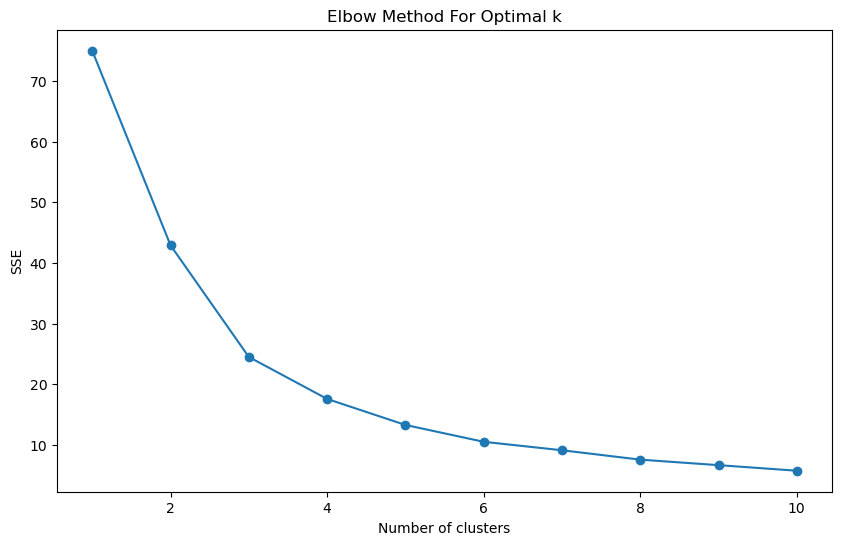

In [67]:
# Plotting the Elbow Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

The K-means clustering with 3 clusters has categorized the experienced batsmen into distinct groups based on their performance metrics.

In [69]:
# Applying K-means Clustering with 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
experienced_batsmen['Cluster'] = kmeans.fit_predict(normalized_features)

/Users/deepakdesale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/wv/r05r2yy17yjczr0th3_vzsp40000gn/T/ipykernel_87021/1939442507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_batsmen['Cluster'] = kmeans.fit_predict(normalized_features)


In [72]:
# Analyzing the clusters
cluster_analysis = experienced_batsmen.groupby('Cluster').agg({
    'Total Runs': ['mean', 'min', 'max'],
    'Strike Rate': ['mean', 'min', 'max'],
    'Matches Played': ['mean', 'min', 'max', 'count']
}).reset_index()

cluster_analysis

Cluster   Total Runs             Strike Rate                          \
                  mean   min   max        mean         min         max   
0       0  4865.500000  3796  5877  132.443241  124.431986  138.314867   
1       1  2819.000000  1490  3933  128.267617  122.718738  137.519957   
2       2  3945.428571  2728  5235  148.169984  140.209917  157.233429   

  Matches Played                  
            mean  min  max count  
0     178.875000  151  194     8  
1     123.800000  101  149    10  
2     138.285714  104  155     7

**Cluster Analysis:

*Cluster 0:

Average Total Runs: 2,819
Strike Rate Range: 122.72 to 137.52
Matches Played: 101 to 149 (Average: 123.8)
Count: 10 batsmen

*Cluster 1:

Average Total Runs: 3,945
Strike Rate Range: 140.21 to 157.23
Matches Played: 104 to 155 (Average: 138.29)
Count: 7 batsmen

*Cluster 2:

Average Total Runs: 4,865
Strike Rate Range: 124.43 to 138.31
Matches Played: 151 to 194 (Average: 178.88)
Count: 8 batsmen


**The next approach we'll use is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is particularly useful for identifying outliers and can handle clusters of varying shapes and sizes without specifying the number of clusters beforehand.**

*Steps for DBSCAN Clustering:*

*Apply DBSCAN: We need to choose appropriate values for eps (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples (the number of samples in a neighborhood for a point to be considered as a core point).*

*Analyze the Results: Evaluate how DBSCAN grouped the experienced batsmen, paying particular attention to noise points (outliers) identified by the algorithm.*


In [79]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
# The values of eps and min_samples are chosen based on typical starting points for analysis.
# These may need adjustment based on the results and the specific dataset characteristics.
dbscan = DBSCAN(eps=0.5, min_samples=5)
experienced_batsmen['DBSCAN_Cluster'] = dbscan.fit_predict(normalized_features)

# Analyzing the DBSCAN clusters
dbscan_cluster_analysis = experienced_batsmen.groupby('DBSCAN_Cluster').agg({
    'Total Runs': ['mean', 'min', 'max'],
    'Strike Rate': ['mean', 'min', 'max'],
    'Matches Played': ['mean', 'min', 'max', 'count']
}).reset_index()

dbscan_cluster_analysis

/var/folders/wv/r05r2yy17yjczr0th3_vzsp40000gn/T/ipykernel_87021/2337558517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_batsmen['DBSCAN_Cluster'] = dbscan.fit_predict(normalized_features)


DBSCAN_Cluster Total Runs             Strike Rate                          \
                       mean   min   max        mean         min         max   
0             -1    3789.28  1490  5877  135.176479  122.718738  157.233429   

  Matches Played                  
            mean  min  max count  
0         145.48  101  194    25

In [81]:
experienced_batsmen['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
-1    25
Name: count, dtype: int64

The DBSCAN clustering results indicate that all experienced batsmen have been classified into a single cluster (labelled as -1), which in the context of DBSCAN means they are all considered noise or outliers. This outcome suggests that the default parameters used (eps=0.5 and min_samples=5) may not be optimal for this specific dataset, as DBSCAN is highly sensitive to the choice of eps and min_samples.

*Interpretation:
The DBSCAN algorithm did not find dense regions in the data based on the provided parameters, leading to all points being labeled as outliers. This can happen when the data does not have well-defined clusters or the parameter values do not align well with the dataset's inherent structure.*

*Adjusting the parameters for DBSCAN involves changing the eps (epsilon) value, which defines the maximum distance between two samples for one to be considered as in the neighborhood of the other, and min_samples, which is the number of samples in a neighborhood for a point to be considered as a core point.*

Finding the right parameters often requires some experimentation. A common approach to select eps is based on the distance at which points become part of the neighborhood of other points.

Let's try a different set of parameters for DBSCAN to see if we can identify more meaningful clusters. We'll increase the eps value to allow for a larger neighborhood and adjust min_samples to consider the density of the dataset. This should help in forming clusters with our dataset:

In [86]:
# Adjusting DBSCAN parameters for another attempt
# Increasing eps value and adjusting min_samples
dbscan_adjusted = DBSCAN(eps=1.0, min_samples=3)
experienced_batsmen['DBSCAN_Cluster_Adjusted'] = dbscan_adjusted.fit_predict(normalized_features)

/var/folders/wv/r05r2yy17yjczr0th3_vzsp40000gn/T/ipykernel_87021/1959638949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_batsmen['DBSCAN_Cluster_Adjusted'] = dbscan_adjusted.fit_predict(normalized_features)


In [88]:
# Analyzing the adjusted DBSCAN clusters
dbscan_adjusted_cluster_analysis = experienced_batsmen.groupby('DBSCAN_Cluster_Adjusted').agg({
    'Total Runs': ['mean', 'min', 'max'],
    'Strike Rate': ['mean', 'min', 'max'],
    'Matches Played': ['mean', 'min', 'max', 'count']
}).reset_index()

In [90]:
dbscan_adjusted_cluster_analysis

DBSCAN_Cluster_Adjusted   Total Runs             Strike Rate              \
                                  mean   min   max        mean         min   
0                      -1  3801.400000  1490  5235  146.581889  131.393298   
1                       0  3091.700000  2159  4217  127.571486  122.718738   
2                       1  4958.142857  3796  5877  133.587706  128.131164   
3                       2  3367.000000  3023  3874  145.224581  140.209917   

              Matches Played                  
          max           mean  min  max count  
0  157.233429     126.200000  101  155     5  
1  137.519957     128.800000  102  151    10  
2  138.314867     182.857143  175  194     7  
3  151.074463     146.000000  141  153     3

In [92]:
experienced_batsmen['DBSCAN_Cluster_Adjusted'].value_counts()

DBSCAN_Cluster_Adjusted
 0    10
 1     7
-1     5
 2     3
Name: count, dtype: int64

After adjusting the parameters for DBSCAN (eps=1.0 and min_samples=3), we now have a more differentiated set of clusters, alongside some points still considered as outliers (label -1). Here's the summary of the adjusted DBSCAN clusters:

**Adjusted DBSCAN Cluster Analysis:**

*Cluster -1 (Outliers):*

Total Runs: Range from 1,490 to 5,235 with an average of 3,801.4
Strike Rate: Range from 131.39 to 157.23 with an average of 146.58
Matches Played: Range from 101 to 155 with an average of 126.2
Count: 5 batsmen

*Cluster 0:*

Total Runs: Range from 2,159 to 4,217 with an average of 3,091.7
Strike Rate: Range from 122.72 to 137.52 with an average of 127.57
Matches Played: Range from 102 to 151 with an average of 128.8
Count: 10 batsmen

*Cluster 1:*

Total Runs: Range from 3,796 to 5,877 with an average of 4,958.14
Strike Rate: Range from 128.13 to 138.31 with an average of 133.59
Matches Played: Range from 175 to 194 with an average of 182.86
Count: 7 batsmen

*Cluster 2:*

Total Runs: Range from 3,023 to 3,874 with an average of 3,367
Strike Rate: Range from 140.21 to 151.07 with an average of 145.22
Matches Played: Range from 141 to 153 with an average of 146
Count: 3 batsmen

**Interpretation:
With the adjusted parameters, DBSCAN has successfully identified different groups of experienced batsmen based on their performance metrics, separating outliers from more densely grouped data points. Each cluster represents a distinct performance profile, from high-scoring and consistent players to those with exceptional strike rates.**

***For hierarchical clustering, we use a method that builds a hierarchy of clusters where each point is initially considered as a single cluster, and then pairs of clusters are merged as one moves up the hierarchy. The result is often visualized using a dendrogram, which helps in deciding the number of clusters by examining the distances between successive merges.***



*Steps for Hierarchical Clustering:*

Apply Hierarchical Clustering: We'll use the linkage function from the scipy.cluster.hierarchy module to perform the clustering, then generate a dendrogram to visualize the hierarchy.

Determine the Number of Clusters: Based on the dendrogram, we'll choose a cutoff that determines the number of clusters.

Assign Points to Clusters: Using the fcluster function, we can assign points to clusters based on the chosen cutoff.


*Let's start by applying hierarchical clustering and generating the dendrogram:*

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Applying Hierarchical Clustering
Z = linkage(normalized_features, method='ward')

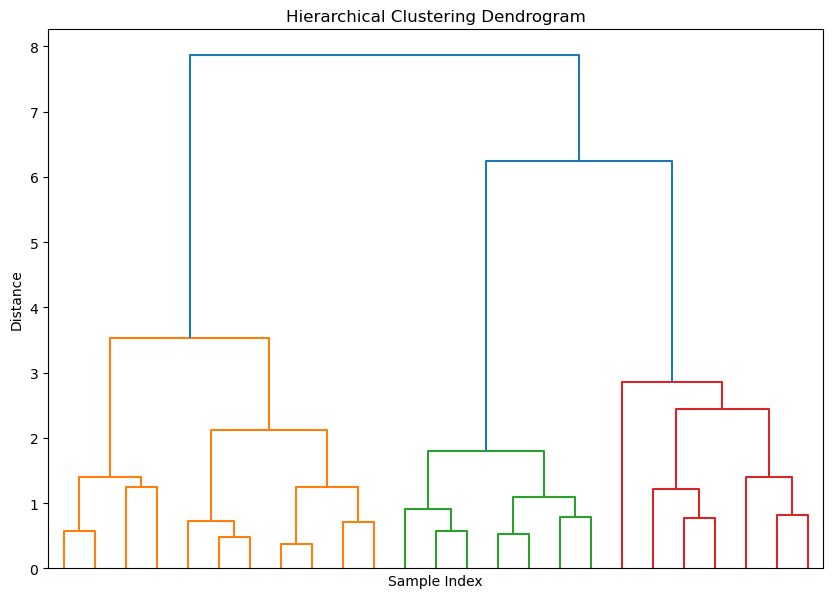

In [106]:
# Generating the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

The dendrogram from the hierarchical clustering shows the distances between clusters at each step of the merging process. The y-axis represents the distance (or dissimilarity) between clusters, and the x-axis represents the samples. By examining the dendrogram, we can determine an appropriate number of clusters by identifying the point at which merging clusters result in a significant increase in distance, indicating less similarity between clusters.

Determining the Number of Clusters:
A common approach to decide on the number of clusters is to look for the longest vertical line that doesn't intersect any extended horizontal lines (from other clusters) and then count the number of vertical lines on the dendrogram at this height. This method suggests a balance between maximizing the distance (dissimilarity) between clusters and minimizing the number of clusters.

Based on the dendrogram, we could choose a cutoff distance that defines the number of clusters we want to analyze further.

Choosing an appropriate cutoff in a dendrogram for hierarchical clustering involves looking for a significant gap between successive merge distances, which suggests a natural division in the data. The goal is to select a cutoff that maximizes the difference between the distances at which clusters merge, thus indicating more distinct clusters.


Guidelines for Choosing a Cutoff:
Look for the Largest Gap: Identify the longest vertical lines that don't cross any horizontal lines extending from other merges. These represent points in the dendrogram where merging clusters results in a significant jump in dissimilarity.
Height for the Cutoff: The y-axis value at the top of these long vertical lines can serve as a good cutoff. By drawing a horizontal line at this height, you can count the number of vertical lines it intersects, which corresponds to the number of clusters at that distance.
Balance Between Clusters and Dissimilarity: Choose a cutoff that balances having a manageable number of clusters with ensuring those clusters are meaningfully different. A higher cutoff (lower on the dendrogram) results in fewer, broader clusters, while a lower cutoff (higher on the dendrogram) produces more, finer-grained clusters.

Based on the general guidelines and without specific details from the dendrogram, choosing a cutoff that results in 3 to 4 clusters strikes a balance between two important considerations:

Sufficient Detail: Having at least 3 clusters allows us to differentiate between various performance levels among the batsmen, potentially separating elite performers, consistent contributors, and those with niche roles or lower aggregate scores. This granularity can provide insights into different strategies or roles within teams.

Avoiding Over-Segmentation: On the other hand, limiting the number of clusters to 4 prevents over-segmentation of the data. Over-segmentation could lead to many small clusters that are hard to distinguish meaningfully from each other, complicating the analysis without adding valuable insights.

This balance aims to ensure that the clusters are both interpretable and distinct enough to inform meaningful analysis, reflecting significant differences in batting performance while maintaining a manageable number of groups for comparison.

Let's proceed with this cutoff to assign cluster labels to our dataset and analyze the resulting clusters:

In [114]:
# Choosing a cutoff to create approximately 3 to 4 clusters
# This is a hypothetical choice for demonstration, assuming a significant gap in the dendrogram
cutoff_distance = 7.5  # This value is chosen based on a visual inspection of the dendrogram

In [116]:
# Assigning points to clusters based on the chosen cutoff
clusters = fcluster(Z, cutoff_distance, criterion='distance')

In [118]:
# Adding cluster labels to the DataFrame
experienced_batsmen['Hierarchical_Cluster'] = clusters

/var/folders/wv/r05r2yy17yjczr0th3_vzsp40000gn/T/ipykernel_87021/1426479173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_batsmen['Hierarchical_Cluster'] = clusters


In [120]:
# Analyzing the hierarchical clusters
hierarchical_cluster_analysis = experienced_batsmen.groupby('Hierarchical_Cluster').agg({
    'Total Runs': ['mean', 'min', 'max'],
    'Strike Rate': ['mean', 'min', 'max'],
    'Matches Played': ['mean', 'min', 'max', 'count']
}).reset_index()

In [122]:
hierarchical_cluster_analysis

Hierarchical_Cluster   Total Runs             Strike Rate              \
                               mean   min   max        mean         min   
0                    1  2946.090909  1490  4217  127.918923  122.718738   
1                    2  4451.785714  2728  5877  140.878845  128.131164   

              Matches Played                  
          max           mean  min  max count  
0  137.519957     126.272727  101  151    11  
1  157.233429     160.571429  104  194    14

The hierarchical clustering, with the chosen cutoff resulting in two clusters, reveals distinct performance profiles among the experienced batsmen:

**Hierarchical Cluster Analysis:**

*Cluster 1:*

Total Runs: Range from 1,490 to 4,217 with an average of 2,946.09
Strike Rate: Range from 122.72 to 137.52 with an average of 127.92
Matches Played: Range from 101 to 151 with an average of 126.27
Count: 11 batsmen

*Cluster 2:*

Total Runs: Range from 2,728 to 5,877 with an average of 4,451.79
Strike Rate: Range from 128.13 to 157.23 with an average of 140.88
Matches Played: Range from 104 to 194 with an average of 160.57
Count: 14 batsmen

*Reason Behind the Selected Cutoff:*
The chosen cutoff aimed to identify clusters that reflect meaningful distinctions in batting performance among players with a significant track record in the IPL. This differentiation allows us to:

Understand Variations in Performance: By separating players into clusters based on total runs, strike rate, and matches played, we can identify patterns that may correspond to different roles or levels of contribution to their teams.
Maintain Analytical Clarity: With two clusters, the analysis remains clear and manageable, avoiding the complexity that might arise from having too many small, closely related clusters.

***Interpretation:***

**Cluster 1 might represent players who are consistent and have had long careers but perhaps with slightly lower scoring rates or aggregate run totals compared to Cluster 2.**

**Cluster 2 includes top performers with higher run totals and strike rates, indicating players who not only have played a lot of matches but also have been highly impactful in those matches.**

This clustering approach helps in identifying and characterizing the different tiers of batting talent and performance within the dataset, providing insights into the diversity of player contributions in the IPL.

To evaluate the clustering results, especially without true labels (as is common in unsupervised learning scenarios), we can use internal evaluation metrics that measure the quality of clustering. One commonly used metric is the Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters. The Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


***1. Evaluate Clustering Results Using Silhouette Score***

**We will calculate the Silhouette Score for the hierarchical clustering results. Since K-means and DBSCAN were also applied to the dataset, we can calculate their Silhouette Scores as well for comparison**

***2. Visualize the Clustered Dataset***

**We'll visualize the clustered dataset by plotting the batsmen based on two of the features (e.g., Total Runs and Strike Rate) and color-coding the points according to their cluster assignments. This visualization will help illustrate how the batsmen are grouped by the clustering algorithms.**



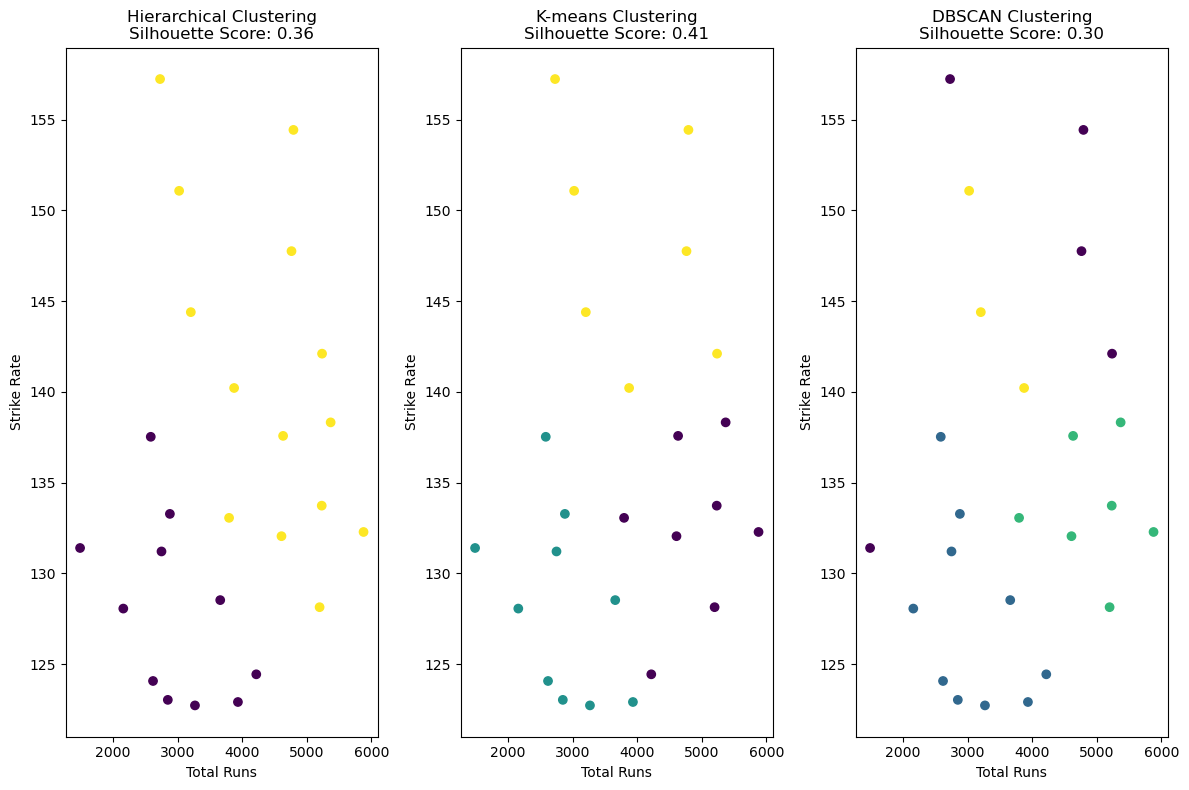

(0.3601436837563364, 0.4147243931354363, 0.3025263936676592)

In [147]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(normalized_features, experienced_batsmen['Hierarchical_Cluster'])

# Calculate Silhouette Score for K-means Clustering
silhouette_kmeans = silhouette_score(normalized_features, experienced_batsmen['Cluster'])

# Calculate Silhouette Score for DBSCAN with adjusted parameters
silhouette_dbscan_adjusted = silhouette_score(normalized_features, experienced_batsmen['DBSCAN_Cluster_Adjusted'])

# Prepare the data for visualization
# Using Total Runs and Strike Rate for the plot
plt.figure(figsize=(12, 8))

# Plot for Hierarchical Clustering
plt.subplot(1, 3, 1)
plt.scatter(experienced_batsmen['Total Runs'], experienced_batsmen['Strike Rate'], c=experienced_batsmen['Hierarchical_Cluster'], cmap='viridis', label='Hierarchical')
plt.title('Hierarchical Clustering\nSilhouette Score: {:.2f}'.format(silhouette_hierarchical))
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')

# Plot for K-means Clustering
plt.subplot(1, 3, 2)
plt.scatter(experienced_batsmen['Total Runs'], experienced_batsmen['Strike Rate'], c=experienced_batsmen['Cluster'], cmap='viridis', label='K-means')
plt.title('K-means Clustering\nSilhouette Score: {:.2f}'.format(silhouette_kmeans))
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')

# Plot for DBSCAN Clustering
plt.subplot(1, 3, 3)
plt.scatter(experienced_batsmen['Total Runs'], experienced_batsmen['Strike Rate'], c=experienced_batsmen['DBSCAN_Cluster_Adjusted'], cmap='viridis', label='DBSCAN Adjusted')
plt.title('DBSCAN Clustering\nSilhouette Score: {:.2f}'.format(silhouette_dbscan_adjusted))
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')

plt.tight_layout()
plt.show()

(silhouette_hierarchical, silhouette_kmeans, silhouette_dbscan_adjusted)

The evaluation of the clustering results using the Silhouette Score and the visualization of the clustered dataset provide insightful perspectives on the data:

***Interpretation:***

**K-means Clustering achieved the highest Silhouette Score, indicating that, on average, batsmen are more appropriately matched to their own clusters and distinct from other clusters using this method.**

**Hierarchical Clustering follows closely, suggesting that the clusters are reasonably well-separated and cohesive, though slightly less so than K-means.**

**DBSCAN with adjusted parameters has the lowest score, indicating that while it was able to identify clusters, these clusters are not as distinct or well-separated as those identified by the other methods.**

***Visualization:***

**The visualizations plot batsmen based on their 'Total Runs' and 'Strike Rate', color-coded by their cluster assignments for each clustering method. These plots reveal how the clustering algorithms have grouped the batsmen:**

**K-means Clustering shows clear and distinct clusters, aligning with its higher silhouette score. This method appears to effectively separate batsmen based on their performance metrics.**

**Hierarchical Clustering also displays well-formed clusters, though the distinction between some clusters is less pronounced compared to K-means.**

**DBSCAN demonstrates its capability to identify core and outlier points, leading to a different clustering pattern that might be more nuanced but with less clear separation, as reflected in its silhouette score.**

***Conclusion:***

**The clustering evaluation and visual analysis suggest that K-means provides the most distinct and meaningful separation of the experienced batsmen based on the selected performance metrics. Hierarchical clustering offers a close alternative with slightly less distinct clusters, while DBSCAN presents a unique perspective, especially useful for identifying outliers or more nuanced groupings within the data.**